In [14]:
# Importing the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import time

In [2]:
start_time = time.time()
train_df = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\spookyAuthor\train.csv")
test_df = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\spookyAuthor\test.csv")
end = time.time()
print("Time taken in reading the input files is {}.".format(end - start_time))
train_df.head()

Time taken in reading the input files is 0.18535614013671875.


,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


We are given the minimum number of fields here -

1. id - Id of the record
2. text - Text - main input data
3. author - Author of the given text In train data the author is given for each text for training, and in text we are only given text data and we are expected to predict the author using the given text. **

In [3]:
# Explore the dataset 
print("Number of rows in train dataset {} ",train_df.shape[0])
print("Number of rows in test dataset {} ",test_df.shape[0])
print("No duplicates in train data") if train_df.shape[0] == train_df.text.unique().__len__() else print("Oops")
print("No duplicates in test data") if test_df.shape[0] == test_df.text.unique().__len__() else print("Oops")
print("Unique author is data {}.".format(train_df.author.unique()))
print("Number of nulls in the train is {} and text is {}.".format(train_df.isnull().sum().sum(), test_df.isnull().sum().sum()))

Number of rows in train dataset {}  19579
Number of rows in test dataset {}  8392
No duplicates in train data
No duplicates in test data
Unique author is data ['EAP' 'HPL' 'MWS'].
Number of nulls in the train is 0 and text is 0.


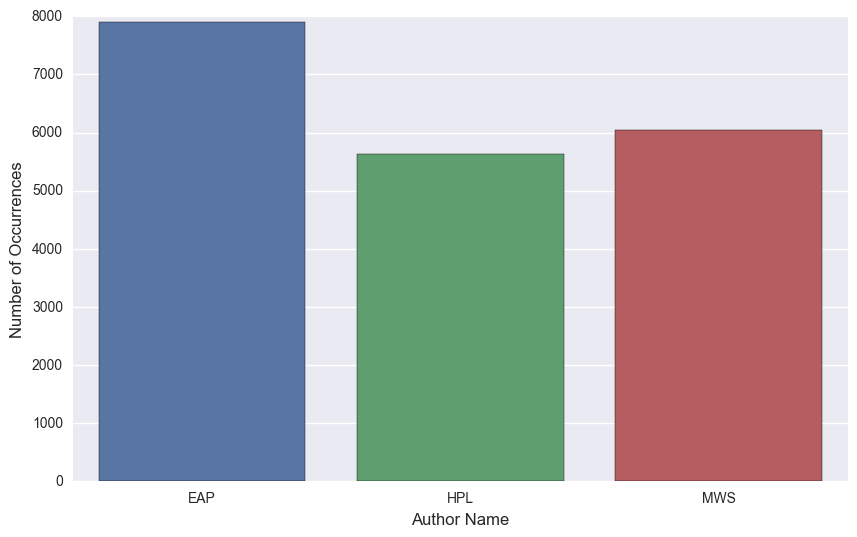

In [4]:
# Checking the frequencies of text for all author in training dataset
author_summary = pd.DataFrame(train_df.groupby('author')['text'].count())
author_summary.reset_index(inplace = True)
plt.figure(figsize=(10,6))
sns.barplot(author_summary.author, author_summary.text)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Author Name', fontsize=12)
plt.show()

In [5]:
# Lets check the avg number of words in text written by each author in a histogram 
def word_count(row):
    """function to calculate the count of words in a given text """
    text = row['text']
    text_splited = text.split(' ')
    # __len__() same as len(train_df.text[0].split(' '))
    word_count = text_splited.__len__()
    return word_count

train_df['word_count'] = ''
train_df['word_count'] = train_df.apply(lambda row: word_count(row), axis =1)

In [11]:
len(train_df.text[0].split(' '))

41

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


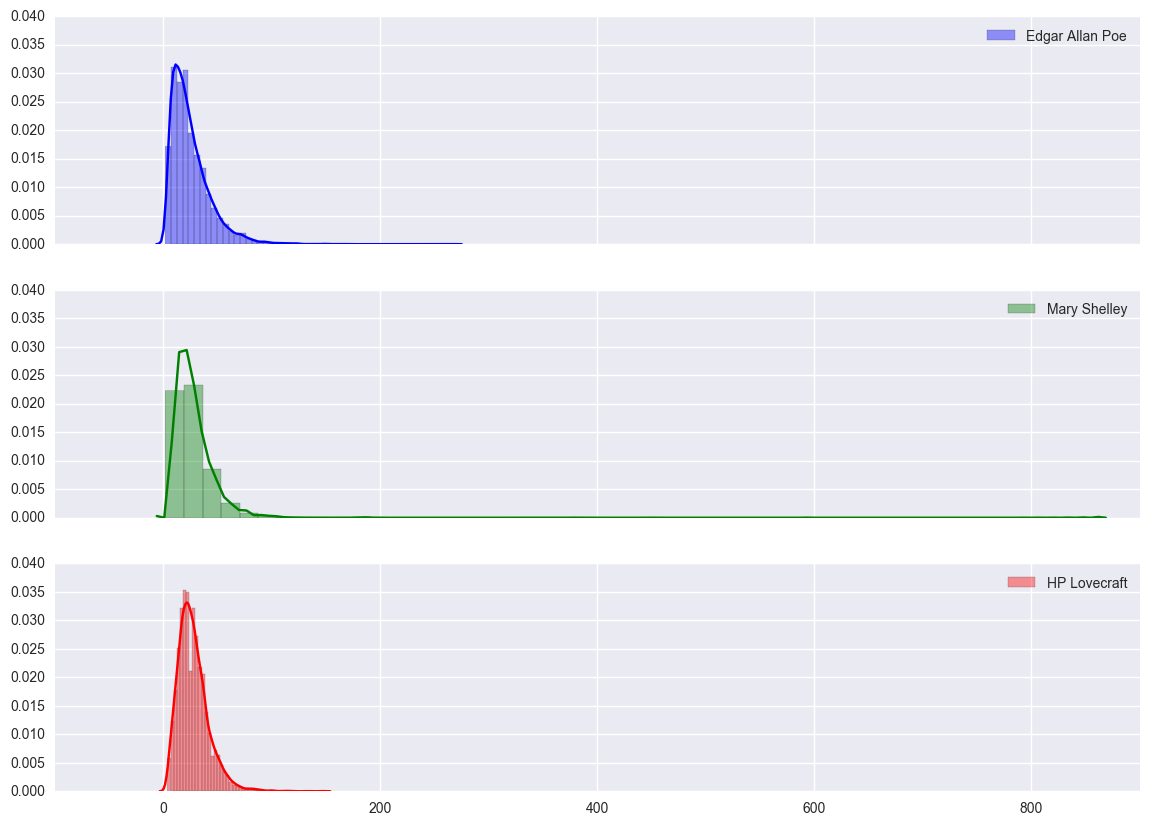

Time taken by above cell is 0.9142787456512451.


In [12]:
start = time.time()
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(14,10))
sns.distplot(train_df.loc[train_df['author']=='EAP']['word_count'].values, ax=ax[0], color='blue', label='Edgar Allan Poe')
sns.distplot(train_df.loc[train_df['author']=='MWS']['word_count'].values, ax=ax[1], color='green', label='Mary Shelley')
sns.distplot(train_df.loc[train_df['author']=='HPL']['word_count'].values, ax=ax[2], color='red', label='HP Lovecraft')
ax[0].legend(loc=0)
ax[1].legend(loc=0)
ax[2].legend(loc=0)
plt.show()
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))

###### Findings -
It can be clearly seen that most of the texts given in the training dataset are has word count from 0 to ~100, but the distribution is diferent in right portion of histograms. HP lovecrafts's text are less scattered, followed by EAP's, and Mary Sheley's text few texts has length ~900 too. This information can be used in hand designed features, for example we can make feature of 0/1 if text is greater than 250 or not, or we can make bins and use this feature, this will sure help in classification of Mary Shelley.

###### Fun time- Wordclouds
If you go in consulting, we see the beautiful word_clouds, expressing the words in horizontal and vertical fashion.The word cloud is nothing but a representation of words in arrangement, in which the size of the word is proportional to the frequency of its occurance. Lets me please your eyes by ploting different wordclouds for different authors.

(-0.5, 399.5, 199.5, -0.5)

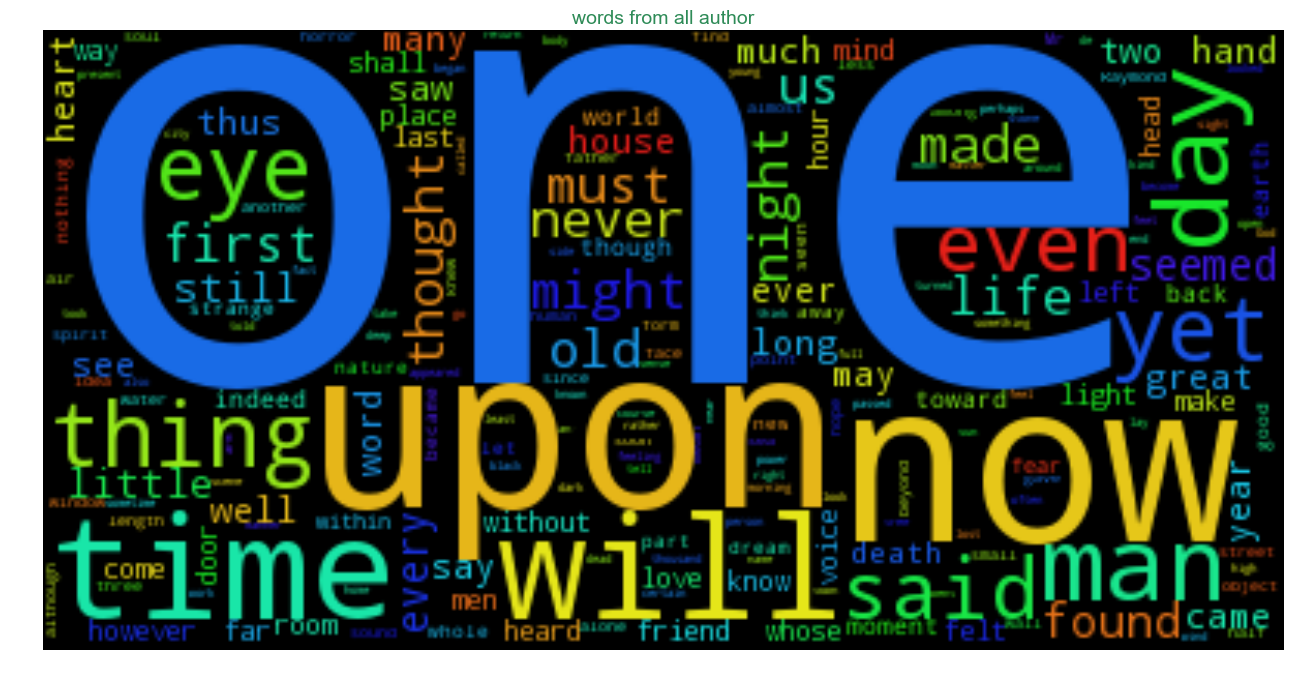

In [15]:
from wordcloud import WordCloud, STOPWORDS
eap = train_df[train_df.author=="EAP"]["text"].values
hpl = train_df[train_df.author=="HPL"]["text"].values
mws = train_df[train_df.author=="MWS"]["text"].values

wc = WordCloud(background_color="black", max_words=5000, 
               stopwords=STOPWORDS)
# generate word cloud
wc.generate(" ".join(train_df.text.values))

# show
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.title("words from all author", fontsize=14,color='seagreen')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

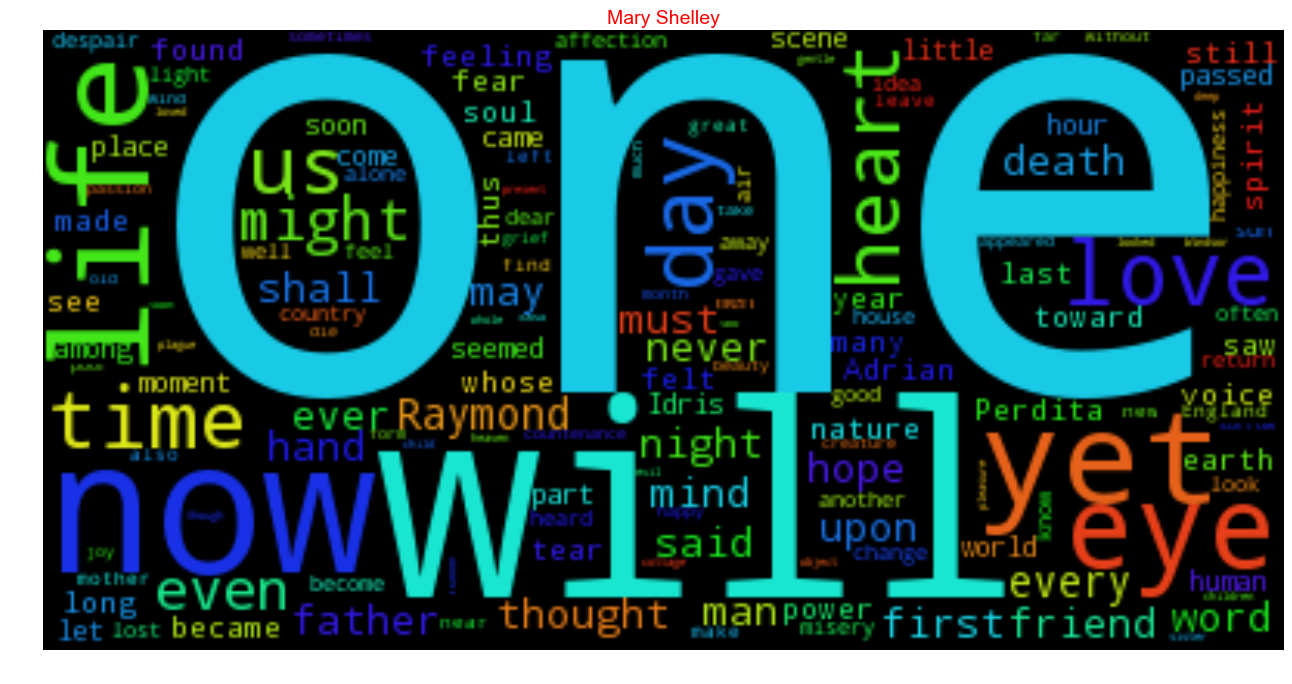

In [16]:
wc = WordCloud(background_color="black", max_words=5000, 
               stopwords=STOPWORDS)
# generate word cloud
wc.generate(" ".join(mws))

# show
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.title("Mary Shelley", fontsize=14,color='red')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

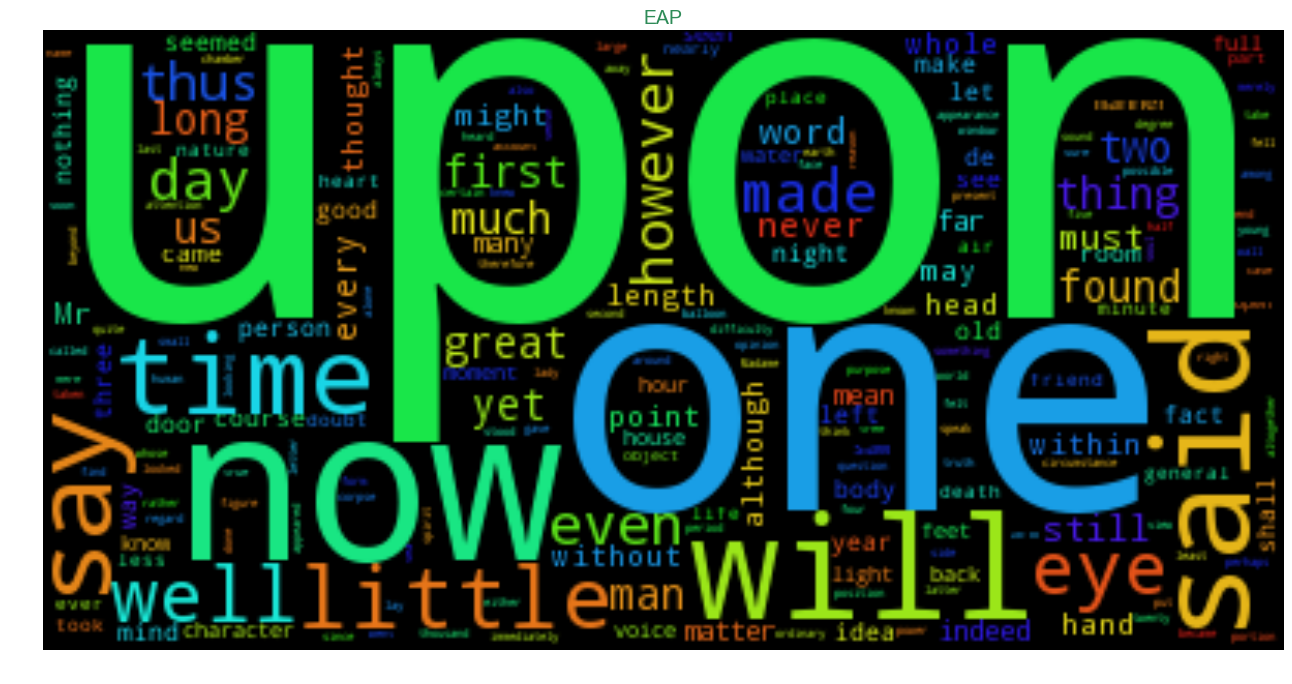

In [17]:
wc = WordCloud(background_color="black", max_words=5000, 
               stopwords=STOPWORDS)
# generate word cloud
wc.generate(" ".join(eap))

# show
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.title("EAP", fontsize=14,color='seagreen')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

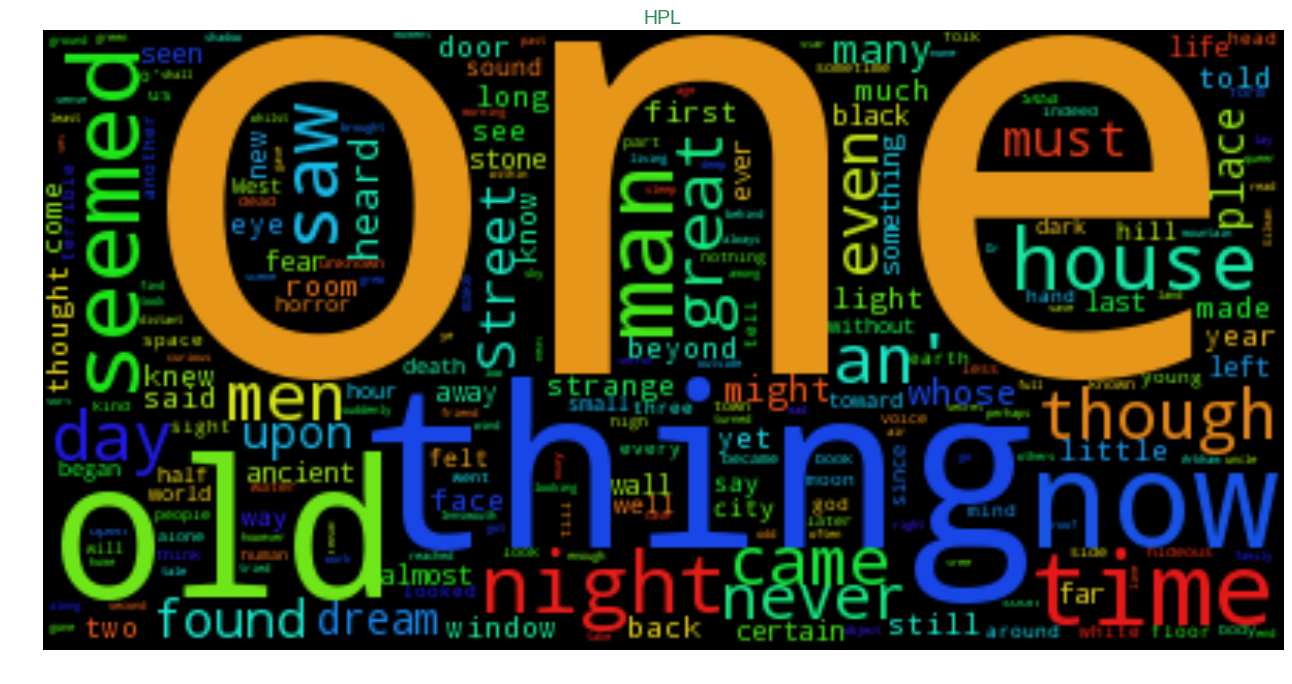

In [18]:
wc = WordCloud(background_color="black", max_words=5000, 
               stopwords=STOPWORDS)
# generate word cloud
wc.generate(" ".join(hpl))

# show
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.title("HPL", fontsize=14,color='seagreen')
plt.axis("off")